## Deep Neural Network for image Classification

Artificial neural networks (ANNs) are the core of deep learning. They are very powerful and scalable tools that have enabled very to tackle wide variety of highly complex machine learning tasks (from image classification to speech recognition and many more).

*Note: Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks*

After this application, you will be able to build your own neural network for supervised learning

### Required packages
[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

### What we will do here?

Here, we will look through how we can design our own shallow neural network. Grasp ideas behing basic building blocks and the mathematics behind it. However, these building blocks are already implemented in optimized way in platforms like tensorflow, pytorch etc. We will thus later see how we can concisely get similar results on these platforms as well. 

Let's keep calm and begin step-by-step!!

### 1. Data loading and preparation

In [4]:
# 1(a) load data from .h5 file and convert to numpy array (remember to unzip your dataset)
import numpy as np
import h5py

# training set
train_dataset = h5py.File('datasets/cat-non-cat/train_catvnoncat.h5', "r")
train_x = np.array (train_dataset["train_set_x"][:])
train_y = np.array( train_dataset["train_set_y"][:])

# testing set
test_dataset = h5py.File('datasets/cat-non-cat/test_catvnoncat.h5', "r")
test_x = np.array (test_dataset["test_set_x"][:])
test_y = np.array( test_dataset["test_set_y"][:])

# class list
classes = np.array(test_dataset["list_classes"][:])

# reshape labels
trainY = train_y.reshape(1, train_y.shape[0])
testY = test_y.reshape((1, test_y.shape[0]))

# warning: check dimensions and be sure of it!!!
print('classes are:', classes)
print('train_x:', train_x.shape)
print('train_y (training labels):', trainY.shape)
print('number of test labels:', testY.shape)

classes are: [b'non-cat' b'cat']
train_x: (209, 64, 64, 3)
train_y (training labels): (1, 209)
number of test labels: (1, 50)


**Look at your data**

y = [1], it's a 'cat' image


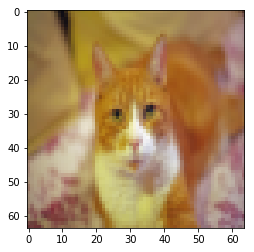

In [5]:
# 1 (b) lets have a look at a cat/non cat picture inside our data
import matplotlib.pyplot as plt
%matplotlib inline    
# allows to plot inside your notepad
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

index = 24
plt.imshow(train_x[index])
print ("y = " + str(trainY[:, index]) + ", it's a '" + classes[np.squeeze(trainY[:, index])].decode("utf-8") +  "' image")

**Flatten your data (vectorize for fully connected network 'FCN')**

In [6]:
# 1 (c) data preparation (vectorize your data for efficient calculation)
# warning: most bugs come into play when your matrix/vector input dimensions are not correctly used

train_x_flatten= train_x.reshape(train_x.shape[0], -1).T
test_x_flatten= test_x.reshape(test_x.shape[0], -1).T

print('flattened training data (train_x_flatten): ', train_x_flatten.shape)
print('flattened testing data (test_x_flatten): ', test_x_flatten.shape)

flattened training data (train_x_flatten):  (12288, 209)
flattened testing data (test_x_flatten):  (12288, 50)


**Normalize your data**

In [7]:
# 1 (d) data preprocessing 
# most common while dealing images is to normalize them by dividing every row of the dataset by 255.
trainX = train_x_flatten/255.
testX = test_x_flatten/255.

### Logistic regression



### 2. Lets build a model consisting of:

    [1] A 2 layer neural network

### 2-layer neural network

<img src="images/2layerNN.png" style="width:600px;height:400px;">
<caption><center> <u>Figure</u>: 2-layer neural network.</center></caption>

<u>Detailed Architecture of above figure</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$. 
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- You then add a bias term and take its relu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- You then repeat the same process.
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias). 
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat.


**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$


**Ingrediants:**

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```  

### 2 (a) Linear-Activation Forward 

Lets prepare activation functions first. Here, we will use two activation functions:

- **Sigmoid**: Non-linear function which has smooth gradient. $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$.  
This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: This is also a non-linear in nature even though it looks linear. This is the current most widely used function in deep learning. The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$.  
This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

In [8]:
#  FUNCTION: sigmoid

def sigmoid(Z):
    """
    Sigmoid activation (for >1 layer neural network we return both A and Z)
    """
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [9]:
def sigmoid_test_case():
    
    result, cache = sigmoid(np.array([0,2]))
                                
    assert(round(result[0], 5) ==  0.5)
    assert(round(result[1], 5) == 0.8808)

    return "OK"

In [10]:
def relu(Z):
    """
    Implement the RELU function (for >1 layer neural network we return both A and Z)

    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

#### Lets look at different activation functions and see what their derivatives look like


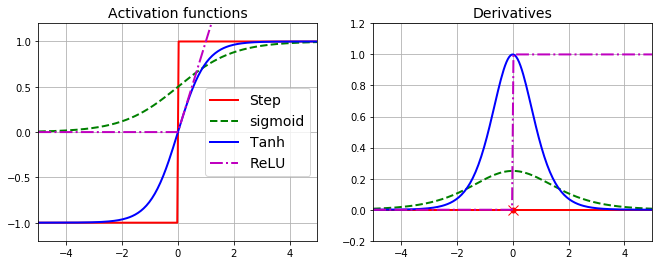

In [11]:
def sigmoid_test(z):
    return 1 / (1 + np.exp(-z))
def relu_test(z):
    return np.maximum(0, z)
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, sigmoid_test(z), "g--", linewidth=2, label="sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu_test(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid_test, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu_test, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
plt.show()

### 2 (b) Initialising parameters and data preparation

There are two types of parameters to initialize in a neural network:
- the weight matrices $W^{[i]}$
- the bias vectors $b^{[i]}$

The weight matrix is initialised with random values while the bias vector as a vector of zeros. Different initializations lead to different results and poor initialisation can slow down the optimisation algorithm (good practive is to try to initialize weights with small values). 

A model with two inputs, one hidden layer with 7 hidden units and an output layer with 1 output unit would have dimensions equal to [2,7,1]. Thus means W1's shape is (7,2), b1 is (7,1), W2 is (1,7) and b2 is (1,1).

Also, remind yourself to flatten your data before using any DNN networks.

In [12]:
# Constants defining the model
n_x = train_x_flatten.shape[0]     # size of input layer 
n_h = 7 # Lets assume: our hidden layer has 7 hidden units (neurons)
n_y = 1 # size of output layer, its binary (0/1) in our case

# define a 2-layer neural netork now (1 hidden layer and 1 output layer with sigmoid function)
nn_layers = (n_x, n_h, n_y)
print(nn_layers)

(12288, 7, 1)


In [13]:
# initialize_parameters

def initialise_parameters(layer_dims):
    """
    intailize w with small random numbers
    intialize b with zeros
    
    check sizes of both
    """
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    parameters['W' + str(1)] =np.random.randn(layer_dims[1], layer_dims[0]) / np.sqrt(layer_dims[0])
    parameters['b' + str(1)] = np.zeros((layer_dims[1], 1))

    parameters['W' + str(2)] =np.random.randn(layer_dims[2], layer_dims[1]) / np.sqrt(layer_dims[1])
    parameters['b' + str(2)] = np.zeros((layer_dims[2], 1))

    assert(parameters['W' + str(1)].shape == (layer_dims[1], layer_dims[0]))
    assert(parameters['b' + str(1)].shape == (layer_dims[1], 1))
    assert(parameters['W' + str(2)].shape == (layer_dims[2], layer_dims[1]))
    assert(parameters['b' + str(2)].shape == (layer_dims[2], 1))

        
    return parameters

### 2 (c) Forward propagation
Mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

We will implement some helper functions and then put all together: 

- linear_forward:  implement the linear part, i.e. the $$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$ equation, where $A^{[0]} = X$.
- linear_activation_forward: will add to the linear part the activation where activation will be either ReLU or Sigmoid. 
- L-model_forward: will call the [LINEAR -> RELU] $\times$ (L-1) times, finally the LINEAR -> SIGMOID

In [14]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.
    A is X for first layer but activation function output for other layers
    """
 
    Z = np.dot(W, A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [15]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation concatenated with linear->activation unit

    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

### 2 (d) Cost function

Now we need to compute the cost, because we want to check if our model is actually learning.

**Next**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$



In [16]:
#  FUNCTION: compute_cost

def compute_cost(Yhat, Y):
    """
    Implement the cross-entropy cost function
    """
    
    m = Y.shape[1]

    # Compute loss from AL and Y.
    logprobs = np.dot(Y, np.log(Yhat).T) + np.dot((1-Y), np.log(1-Yhat).T)

    cost = (-1./m) * logprobs 

    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

### 2 (e) Backward propagation module

Lets now implement ingredients for backward function for the network

Now, similar to forward propagation, we are going to build the backward propagation in three steps:

- linear backward
- LINEAR --> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR --> RELU] $\times$ (L-1) --> LINEAR --> SIGMOID backward (whole model)

In [17]:
# ingredient for backward activation 
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    dZ: Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [18]:
# ingredient for backward activation 
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

**Linear backward**

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Now we need to compute the three derivatives $(dW^{[l]}, db^{[l]}, dA^{[l]})$, using as input a known derivate $dZ^{[l]}  = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. :


$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [19]:
#  FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l) 
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1./m) * np.dot(dZ, A_prev.T)
    db = (1./m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [20]:
#  FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the concatenated linear-->activation layer. 
    
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

### 2(f) Update parameters

In this section we will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, we store them in the parameters dictionary. 


In [21]:
# update_parameters
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    parameters["W"+str(1)] = parameters["W"+str(1)] - learning_rate * grads["dW" + str(1)]
    parameters["b"+str(1)] = parameters["b"+str(1)] - learning_rate * grads["db" + str(1)]

    parameters["W"+str(2)] = parameters["W"+str(2)] - learning_rate * grads["dW" + str(2)]
    parameters["b"+str(2)] = parameters["b"+str(2)] - learning_rate * grads["db" + str(2)]
    
    return parameters

### 2 (g) Build a learnable L-layer neural network

Put all the ingrediants together 

Recall, 

    [1] initialization of parameters / define hyperparameters
    [2] forward propagation
    [3] compute cost 
    [4] background propagation
    [5] update parameters (using parameters and grads from backprop)
    [6] loop [2] to [5] untill some convergence/iterations
    [7] use trained parameters to predict labels

In [22]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a two-layer neural network
    Remember your model: 1) linear--> relu --> linear --> sigmoid
    
    Your two layer model: remember you will use the units that you have built above and 
    call here for iterative minimization of you cost as illustrated by the algorithm above

    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary
    # remember to initialize all weights and biases in your neural network layer
    parameters = initialise_parameters(layers_dims)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop for gradient descent

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. 
        # Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [23]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  2-layer neural network.
    You will need the last layer activation A2 which will be your prediction here (i.e. sigmoid function)
    You will then take predictions > 0.5 as success (1) and <0.5 as failed (0) which you will store for all samples 'm'
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    # your number of prediction = number of samples
    p = np.zeros((1,m))
    
    # Forward propagation
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
    probas, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
    
    # convert probs to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    # print results
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

### For 2-layer nn

My 2-layer network consists of  1 hidden layers with  7 neurons
Cost after iteration 0: 0.6950464961800915
Cost after iteration 100: 0.5892596054583805
Cost after iteration 200: 0.5232609173622991
Cost after iteration 300: 0.4497686396221906
Cost after iteration 400: 0.4209002161883899
Cost after iteration 500: 0.3724640306174595
Cost after iteration 600: 0.34742051870201907
Cost after iteration 700: 0.31719191987370277
Cost after iteration 800: 0.2664377434774658
Cost after iteration 900: 0.21991432807842587
Cost after iteration 1000: 0.14357898893623774
Cost after iteration 1100: 0.45309212623221357
Cost after iteration 1200: 0.09499357670093511
Cost after iteration 1300: 0.08014128076781368
Cost after iteration 1400: 0.0694023400553646
Cost after iteration 1500: 0.060216640231745895
Cost after iteration 1600: 0.05327415758001874
Cost after iteration 1700: 0.04762903262098432
Cost after iteration 1800: 0.04297588879436867
Cost after iteration 1900: 0.03903607436513821
Cost after iter

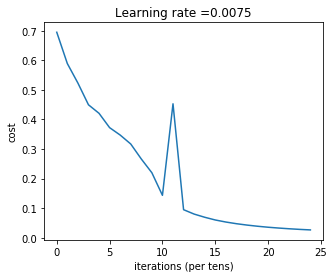

In [24]:
# remember you 2 layers
print('My 2-layer network consists of ', len(nn_layers)-2, 'hidden layers with ', nn_layers[1] ,'neurons')
np.random.seed(1)
fit_params_2layer = two_layer_model(trainX, trainY, nn_layers, num_iterations = 2500, print_cost=True)

In [25]:
pred_train = predict(trainX, trainY, fit_params_2layer)

Accuracy: 0.9999999999999998


In [26]:
pred_test = predict(testX, testY, fit_params_2layer)

Accuracy: 0.74


### 3. Analysis

Here we will try to analyse and test our results

In [27]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        t1 = classes[int(p[index])].decode("utf-8")
        t2 = classes[y[0,index]].decode("utf-8")
        plt.title("Prediction: " + t1 + " \n Class: " + t2)
        
    return num_images

### 3 (a) Find incorrect classification

Use the provided function to display incorrectly classified cat vs non-cat objects

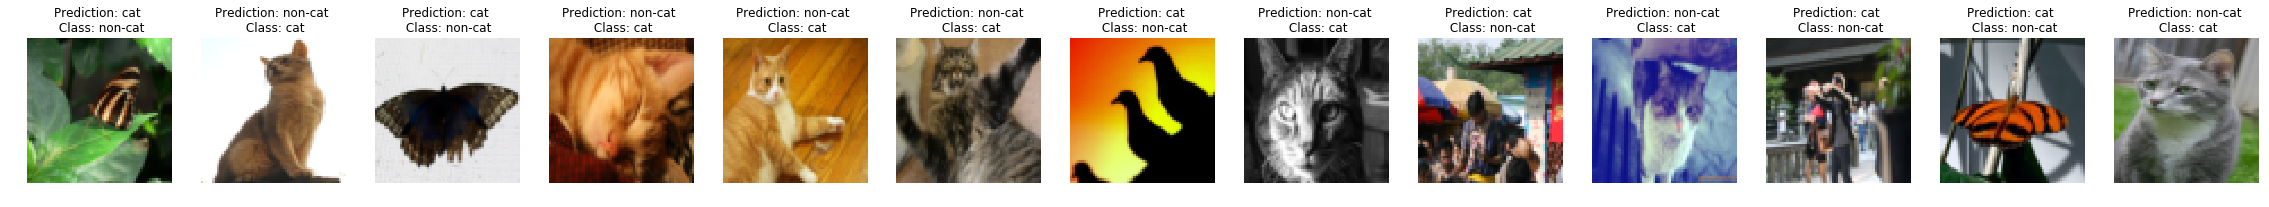

In [28]:
misses = print_mislabeled_images(classes, testX, testY, pred_test[0])

In [29]:
print("Number of misses: {0}".format(misses))

Number of misses: 13


### 3 (b) Use your own data to check if you are able to detect cat vs non-cat animals/objects

In [30]:
# set default size of plots (this is handy in case you want to print couple of times with different images)
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

/Users/shariba/miniconda3/envs/alitorch/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':
/Users/shariba/miniconda3/envs/alitorch/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # This is added back by InteractiveShellApp.init_path()


Accuracy: 1.0
y = 0.0, the algorithm predicts a "non-cat" image.


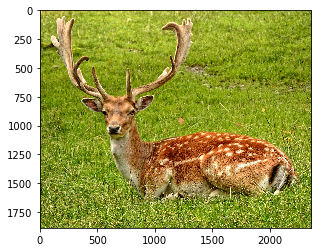

In [31]:
# Load your image (download any cat or non cat image and provide the file name along with full path here)
import scipy
from scipy import ndimage
num_px = train_x.shape[1] # this is original size e.g. 64 x 64 or ..
image= ['cat.jpg', 'deer.jpg']
#'dog-3.jpg', 'squirrel.jpg'
fileName = 'images/test/'+ image[1]

image = np.array(scipy.ndimage.imread(fileName, flatten=False))

my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))

my_predicted_image = predict(my_image, [0], fit_params_2layer)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" image.")

**Exercises:**

- Change your learning parameter and increase number of neurons in this 2-layer network 
- Your should now be able to build a 5-layer neural network and generalize it to L layer. This will help you to understand how deeper networks help to gain better accuracy. Nevertheless, there is also need for larger datasets with such networks.
- Change your dataset to MNIST dataset which has 60k train samples and 10k test samples and try to report your training and validation accuracies. 

**Acknowledgment**
This notebook has been created using materials from Coursera course of Andrew Ng.

In [3]:
# Help for loading MNIST dataset
import numpy as np
data = np.load('datasets/MNIST_data/mnist.npz')
x_train= data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# Note if this does not work then use below
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()